<a href="https://colab.research.google.com/github/salonigupta1/DeepLearningProjects/blob/main/StockPricePredictionAndForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = 'f03ddc1f390d58807e2150fa85fb792eda7fd2ee')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df2 = df.reset_index()['close']

In [8]:
df1 = df.reset_index()['close']

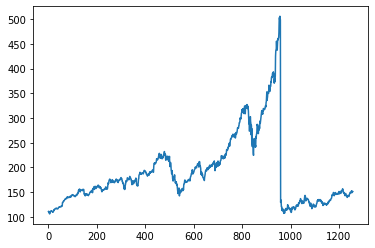

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [12]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size: len(df1), :1]

In [13]:
import numpy

In [14]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)


In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 12s 192ms/step - loss: 0.0119 - val_loss: 0.0275
Epoch 2/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0040 - val_loss: 0.0230
Epoch 3/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0014 - val_loss: 0.0214
Epoch 4/100
12/12 [==============================] - 1s 82ms/step - loss: 7.5888e-04 - val_loss: 0.0235
Epoch 5/100
12/12 [==============================] - 1s 82ms/step - loss: 5.3932e-04 - val_loss: 0.0255
Epoch 6/100
12/12 [==============================] - 1s 83ms/step - loss: 5.1468e-04 - val_loss: 0.0230
Epoch 7/100
12/12 [==============================] - 1s 82ms/step - loss: 4.7280e-04 - val_loss: 0.0227
Epoch 8/100
12/12 [==============================] - 1s 81ms/step - loss: 4.5112e-04 - val_loss: 0.0228
Epoch 9/100
12/12 [==============================] - 1s 82ms/step - loss: 4.0713e-04 - val_loss: 0.0208
Epoch 10/100
12/12 [==============================] - 1s 82ms/step - loss:

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.6.0'

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

194.00786825774932

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

193.50193513896286

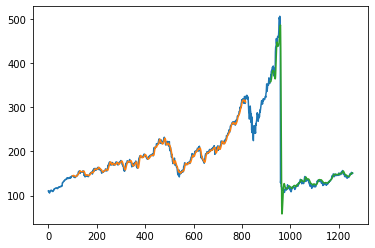

In [29]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
   
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.1302674412727356], [0.13068397343158722], [0.13109393417835236], [0.13149745762348175], [0.13189463317394257], [0.13228553533554077], [0.13267022371292114], [0.13304877281188965], [0.13342119753360748], [0.133787602186203], [0.1341479867696762], [0.13450245559215546], [0.13485103845596313], [0.1351938247680664], [0.13553082942962646], [0.13586218655109406], [0.13618794083595276], [0.13650819659233093], [0.13682301342487335], [0.13713249564170837], [0.13743668794631958], [0.1377357691526413], [0.13802973926067352], [0.1383187621831894], [0.13860280811786652], [0.1388821005821228], [0.13915665447711945], [0.1394265592098236], [0.13969187438488007], [0.13995274901390076]]


In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt

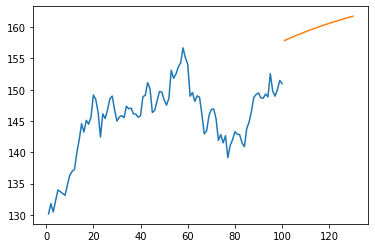

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

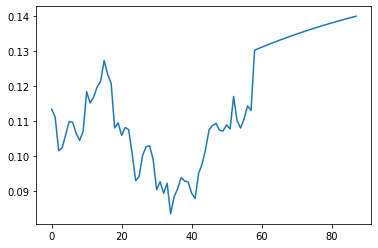

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

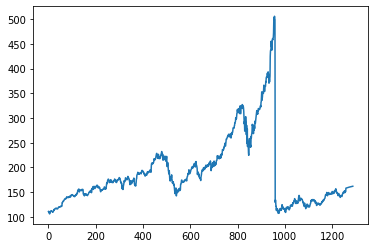

In [42]:
plt.plot(df3)